In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

## Data preprocessing and feature engineering

In [2]:
movies=pd.read_csv("movies.csv")

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738336 entries, 0 to 738335
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    738336 non-null  int64  
 1   title                 738332 non-null  object 
 2   genres                519713 non-null  object 
 3   original_language     738336 non-null  object 
 4   overview              618328 non-null  object 
 5   popularity            738336 non-null  float64
 6   production_companies  342642 non-null  object 
 7   release_date          682898 non-null  object 
 8   budget                738336 non-null  float64
 9   revenue               738336 non-null  float64
 10  runtime               700752 non-null  float64
 11  status                738336 non-null  object 
 12  tagline               109432 non-null  object 
 13  vote_average          738336 non-null  float64
 14  vote_count            738336 non-null  float64
 15  

In [4]:
movies.head(2)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,505642,Black Panther: Wakanda Forever,Action-Adventure-Science Fiction,en,Queen Ramonda Shuri M’Baku Okoye and the Dora ...,4594.775,Marvel Studios,2022-11-09,250000000.0,330000000.0,162.0,Released,Forever.,7.593,473.0,Letitia Wright-Lupita Nyong'o-Danai Gurira-Win...,hero-sequel-superhero-based on comic-duringcre...,/sv1xJUazXeYqALzczSZ3O6nkH75.jpg,/8sMmAmN2x7mBiNKEX2o0aOTozEB.jpg,436270-785084-928123-663712-555604-615952-7441...
1,663712,Terrifier 2,Horror-Thriller,en,After being resurrected by a sinister entity A...,4528.571,Bloody Disgusting-Dark Age Cinema-Fuzz on the ...,2022-10-06,250000.0,10155347.0,138.0,Released,Who's laughing now?,6.963,585.0,Lauren LaVera-David Howard Thornton-Elliott Fu...,clown-halloween-resurrection-sequel-gore-slash...,/b6IRp6Pl2Fsq37r9jFhGoLtaqHm.jpg,/y5Z0WesTjvn59jP6yo459eUsbli.jpg,436270-732459-928123-575322-675054-420634-6427...


In [5]:
#Drop unuseful columns
movies=movies.drop(['id','overview','poster_path','production_companies','backdrop_path','recommendations'], axis=1)

In [6]:
movies['status'].unique()

array(['Released', 'Post Production', 'In Production', 'Planned',
       'Canceled', 'Rumored'], dtype=object)

In [7]:
#Select only released movies
movies_released=movies.query('status == "Released"')
movies_released=movies_released.drop('status',axis=1)

In [8]:
#Convert the format of release_date column
movies_released['release_date']=pd.to_datetime(movies_released['release_date'])

In [9]:
#Select movies between 2000 to 2020
movies_released[(movies_released['release_date'] < "2020-01-01")& (movies_released['release_date'] >= '2000-01-01')]

In [10]:
movies.duplicated().sum()

90

In [11]:
#Drop duplicate records
movies.drop_duplicates(inplace=True)
movies.duplicated().sum()

0

In [12]:
#Replace the NA with 0 and No-NA with 1 in tagline column
movies['has_tagline']=movies['tagline'].notnull().astype('int')

In [13]:
#calculate the number of words in tagline for each movie
movies['tagline_words']= movies['tagline'].astype(str).str.split().str.len()

In [14]:
#Deal with missing data
movies.isnull().sum()

title                     1
genres                94460
original_language         0
popularity                0
release_date              0
budget                    0
revenue                   0
runtime               17391
tagline              291233
vote_average              0
vote_count                0
credits              106991
keywords             237040
has_tagline               0
tagline_words             0
dtype: int64

In [15]:
movies.dropna(inplace=True)

In [16]:
#Drop the abnormal data(budget and revenue are all zero)
movies=movies.query('budget>0 & revenue>0')

<AxesSubplot:xlabel='runtime'>

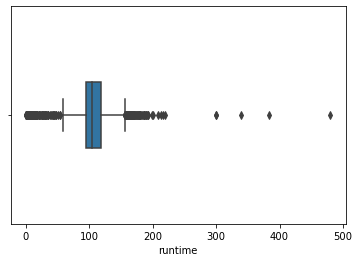

In [17]:
#Detect and remove outliers in runtime and popularity
sns.boxplot(movies['runtime'],width=0.3)

In [18]:
movies=movies.query('runtime<300')

<AxesSubplot:xlabel='popularity'>

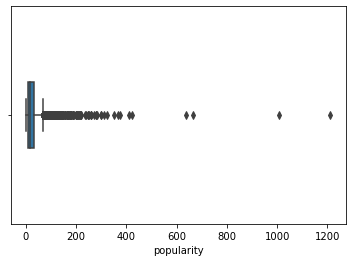

In [19]:
sns.boxplot(movies['popularity'],width=0.3)

In [20]:
movies=movies.query('popularity<600')

<AxesSubplot:xlabel='vote_count'>

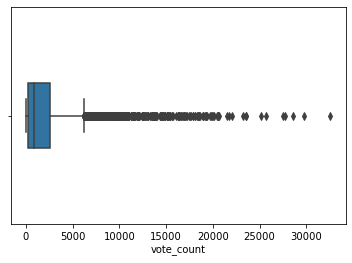

In [21]:
sns.boxplot(movies['vote_count'],width=0.3)

In [22]:
movies=movies.query('vote_count<20000')

In [23]:
#take the log of revenue and budget
movies['log_revenue'] = np.log(movies['revenue'])
movies['log_budget'] = np.log(movies['budget'])

In [24]:
movies['credits']=movies['credits'].astype(str).str.split('-')
movies['credits']

123       [Dakota Fanning, Teri Hatcher, Keith David, Je...
136       [Daniel Radcliffe, Rupert Grint, Emma Watson, ...
148       [Anna Faris, Jon Abrahams, Marlon Wayans, Shaw...
159       [Daniel Radcliffe, Rupert Grint, Emma Watson, ...
164       [Andrew Garfield, Sam Worthington, Vince Vaugh...
                                ...                        
716684    [Humayun Saeed, Sheheryar Munawar Siddiqui, Sy...
728969    [Andreo Chimal, Otoniel Noris, Emmanuel López,...
729507    [Mohammad Ali Gerami, Hadis Eftekhari, Aamin R...
730121                     [BID, Manoj Kumar, Prachi Uppal]
731786                     [Paras Gola, Ron Devil, Khayaal]
Name: credits, Length: 4291, dtype: object

In [25]:
#Create a new column to show the first credit person
movies['credit_first']=movies['credits'].str[0]

In [26]:
movies['original_language'].value_counts().head()

en    3655
hi     113
es      80
fr      71
ko      61
Name: original_language, dtype: int64

In [27]:
#Transform the language column to represent if the language is English
movies.loc[movies['original_language']=='en', 'original_language'] = 1
movies.loc[movies['original_language']!='en', 'original_language'] = 0

In [28]:
movies['original_language'].value_counts().head()

0    4291
Name: original_language, dtype: int64

In [29]:
#alculate the number of keywords for each movie
movies['keywords_num']=movies['keywords'].astype(str).str.split('-').str.len()

In [30]:
#alculate the number of words in title for each movie
movies['title_num']=movies['title'].astype(str).str.split('-').str.len()

In [31]:
movies2=movies.copy()

# Data Processing, Considering keywords, credits, and genres

In [32]:
movies=movies2.copy()

In [33]:
def spliting(content):
    lst= content.split('-')
    return lst

In [34]:
movies['keywords_split']=movies['keywords'].apply(lambda x: spliting(x))
movies['genres_split']=movies['genres'].apply(lambda x: spliting(x))

In [35]:
movies['year']=movies['release_date'].apply(lambda x: x.year)

In [36]:
movies.head(2)

,title,genres,original_language,popularity,release_date,budget,revenue,runtime,tagline,vote_average,...,has_tagline,tagline_words,log_revenue,log_budget,credit_first,keywords_num,title_num,keywords_split,genres_split,year
123,Coraline,Animation-Family-Fantasy,0,410.378,2009-02-05,60000000.0,124600000.0,100.0,Be careful what you wish for.,7.806,...,1,6,18.640619,17.909855,Dakota Fanning,11,1,"[based on novel or book, dream, eye, stop moti...","[Animation, Family, Fantasy]",2009
136,Harry Potter and the Chamber of Secrets,Adventure-Fantasy,0,374.453,2002-11-13,100000000.0,876688482.0,161.0,Hogwarts is back in session.,7.726,...,1,5,20.591662,18.420681,Daniel Radcliffe,15,1,"[flying car, witch, sword, magic, diary, child...","[Adventure, Fantasy]",2002


In [37]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

genres=movies['genres_split']
genres_detokenized = genres.apply(TreebankWordDetokenizer().detokenize)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer() #min_df=0.5
sparse_dtm = countvec.fit_transform(genres_detokenized)
genres_df = pd.DataFrame(sparse_dtm.toarray(), columns=countvec.get_feature_names(), index=movies.index)


In [39]:
genres_df.head()

,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,...,horror,movie,music,mystery,romance,science,thriller,tv,war,western
123,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
136,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
148,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
164,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
keywords=movies['keywords_split']
keywords_detokenized = keywords.apply(TreebankWordDetokenizer().detokenize)

countvec = CountVectorizer(min_df=0.01) #min_df=0.5
sparse_dtm = countvec.fit_transform(keywords_detokenized)
keywords_df = pd.DataFrame(sparse_dtm.toarray(), columns=countvec.get_feature_names(), index=movies.index)

In [41]:
keywords_df.head()

,1960s,1970s,1980s,19th,abuse,action,adult,aftercreditsstinger,age,agent,...,wedding,wife,witch,woman,world,wrestling,writer,york,young,zombie
123,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
136,0,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [49]:
def merge_names(context):
    the_list=[]
    for i in range(0,len(context)):
        new_name=context[i].replace(' ',' ')
        the_list.append(new_name)
    return the_list

In [50]:
movies['test']=movies['credits'].apply(lambda x: merge_names(x))

In [51]:
movies.head(2)

,title,genres,original_language,popularity,release_date,budget,revenue,runtime,tagline,vote_average,...,tagline_words,log_revenue,log_budget,credit_first,keywords_num,title_num,keywords_split,genres_split,year,test
123,Coraline,Animation-Family-Fantasy,0,410.378,2009-02-05,60000000.0,124600000.0,100.0,Be careful what you wish for.,7.806,...,6,18.640619,17.909855,Dakota Fanning,11,1,"[based on novel or book, dream, eye, stop moti...","[Animation, Family, Fantasy]",2009,"[Dakota Fanning, Teri Hatcher, Keith David, Je..."
136,Harry Potter and the Chamber of Secrets,Adventure-Fantasy,0,374.453,2002-11-13,100000000.0,876688482.0,161.0,Hogwarts is back in session.,7.726,...,5,20.591662,18.420681,Daniel Radcliffe,15,1,"[flying car, witch, sword, magic, diary, child...","[Adventure, Fantasy]",2002,"[Daniel Radcliffe, Rupert Grint, Emma Watson, ..."


In [52]:
credits=movies['test']
credits_detokenized = credits.apply(TreebankWordDetokenizer().detokenize)

countvec = CountVectorizer(min_df=0.05) #min_df=0.5
sparse_dtm = countvec.fit_transform(credits_detokenized)
credits_df = pd.DataFrame(sparse_dtm.toarray(), columns=countvec.get_feature_names(), index=movies.index)

In [53]:
credits[123]

['Dakota Fanning',
 'Teri Hatcher',
 'Keith David',
 'Jennifer Saunders',
 'Ian McShane',
 'Dawn French',
 'John Hodgman',
 'Robert Bailey Jr.',
 'Aankha Neal',
 'Hannah Kaiser',
 'George Selick',
 'Harry Selick',
 'Marina Budovsky',
 'Emerson Tenney',
 'Jerome Ranft',
 'Christopher Murrie',
 'Jeremy Ryder',
 'Carolyn Crawford',
 'Yona Prost',
 'John Linnell']

In [54]:
credits_df.head()

,aaron,adam,alan,alex,alexander,allen,amanda,amy,anderson,andrew,...,tom,tony,tyler,van,vincent,will,william,williams,wilson,young
123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,1,0,0,0,0,0,0,0,...,2,1,0,0,0,0,0,1,0,0
148,0,0,0,0,0,0,0,0,0,1,...,0,0,0,2,0,0,0,0,0,0
159,0,0,1,0,0,0,0,0,0,0,...,1,2,0,1,0,1,1,1,0,0
164,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


# Modeling

In [55]:
pd.set_option('display.max_columns', None)

In [56]:
movies.head(2)

,title,genres,original_language,popularity,release_date,budget,revenue,runtime,tagline,vote_average,vote_count,credits,keywords,has_tagline,tagline_words,log_revenue,log_budget,credit_first,keywords_num,title_num,keywords_split,genres_split,year,test
123,Coraline,Animation-Family-Fantasy,0,410.378,2009-02-05,60000000.0,124600000.0,100.0,Be careful what you wish for.,7.806,6133.0,"[Dakota Fanning, Teri Hatcher, Keith David, Je...",based on novel or book-dream-eye-stop motion-s...,1,6,18.640619,17.909855,Dakota Fanning,11,1,"[based on novel or book, dream, eye, stop moti...","[Animation, Family, Fantasy]",2009,"[Dakota Fanning, Teri Hatcher, Keith David, Je..."
136,Harry Potter and the Chamber of Secrets,Adventure-Fantasy,0,374.453,2002-11-13,100000000.0,876688482.0,161.0,Hogwarts is back in session.,7.726,18919.0,"[Daniel Radcliffe, Rupert Grint, Emma Watson, ...",flying car-witch-sword-magic-diary-child hero-...,1,5,20.591662,18.420681,Daniel Radcliffe,15,1,"[flying car, witch, sword, magic, diary, child...","[Adventure, Fantasy]",2002,"[Daniel Radcliffe, Rupert Grint, Emma Watson, ..."


In [57]:
movies_p=movies[['log_revenue','log_budget','popularity',
                 'vote_average','vote_count','year','original_language']]
data=pd.concat([movies_p,genres_df,keywords_df,credits_df],axis=1)

In [58]:
data.head(2)

,log_revenue,log_budget,popularity,vote_average,vote_count,year,original_language,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,history,horror,movie,music,mystery,romance,science,thriller,tv,war,western,1960s,1970s,1980s,19th,abuse,action,adult,aftercreditsstinger,age,agent,airplane,alien,american,and,angeles,animal,animation,anti,army,arts,assassin,bank,based,battle,best,biography,black,book,brother,buddy,business,california,car,century,chase,child,children,christmas,cia,city,class,college,comedy,comic,coming,competition,conspiracy,cop,corruption,crash,creature,crime,criminal,crisis,cult,dark,daughter,death,detective,director,dog,drama,dream,drug,drugs,duringcreditsstinger,dying,dystopia,england,escape,evil,ex,family,father,fbi,female,fight,film,fire,flashback,footage,football,forest,france,friend,friends,friendship,future,game,gang,gangster,gay,ghost,girl,gun,heist,hero,high,historical,horror,hospital,hostage,hotel,house,human,husband,identity,ii,in,infidelity,intelligence,invasion,investigation,island,journalist,kidnapping,killer,lawyer,lgbt,life,live,london,los,loss,love,loved,magic,male,man,marriage,martial,mexico,military,mission,money,monster,mother,movie,murder,music,musical,nazi,neo,new,noir,novel,of,officer,on,one,or,parent,paris,party,person,police,politics,post,power,pregnancy,prison,pro,protagonist,psychopath,race,rape,relationship,relationships,religion,remake,rescue,revenge,rivalry,road,robbery,robot,romance,romantic,school,scientist,secret,sequel,serial,sex,sexual,shootout,sibling,single,small,soldier,son,south,space,sports,spy,story,street,student,suicide,super,superhero,supernatural,survival,sword,teen,teenage,terrorist,the,thriller,time,to,torture,town,travel,trip,true,undercover,up,usa,vampire,video,war,wedding,wife,witch,woman,world,wrestling,writer,york,young,zombie,aaron,adam,alan,alex,alexander,allen,amanda,amy,anderson,andrew,andy,anna,anne,anthony,ashley,baker,bell,ben,bill,billy,bob,brian,brown,bruce,campbell,charles,chris,christian,christopher,colin,craig,dan,daniel,danny,david,davis,de,don,douglas,eddie,elizabeth,emily,eric,frank,gary,george,greg,harris,henry,howard,ian,jack,jackson,jake,james,jamie,jane,jason,jay,jean,jeff,jennifer,jeremy,jessica,jim,joe,john,johnny,johnson,jon,jonathan,jones,jordan,joseph,josh,jr,justin,kate,keith,kelly,ken,kevin,kim,king,laura,lauren,lee,lewis,lisa,maria,marie,mark,martin,mary,matt,matthew,max,michael,michelle,mike,miller,moore,morgan,nicholas,nick,nicole,patrick,paul,peter,rachel,ray,richard,rob,robert,roberts,ron,rose,russell,ryan,sam,sarah,scott,sean,simon,smith,stephanie,stephen,steve,steven,stewart,taylor,thomas,tim,tom,tony,tyler,van,vincent,will,william,williams,wilson,young
123,18.640619,17.909855,410.378,7.806,6133.0,2009,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
136,20.591662,18.420681,374.453,7.726,18919.0,2002,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [59]:
from sklearn.model_selection import train_test_split
Y=data['log_revenue']
X=data.drop(columns='log_revenue',inplace=False)

X_train, X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=88)

In [60]:
def OSR2(y_train, y_test,y_predict):   
    y_test = y_test
    y_pred = y_predict
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)    
    
    return 1 - SSE/SST

Model 1: Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(X_train, Y_train)
Y_pred1=model1.predict(X_test)

osr2_1=OSR2(Y_train,Y_test,Y_pred1)
print('The OSR^2 is: ',osr2_1)

The OSR^2 is:  0.7851254325758611


Model 2: CART

In [210]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor(ccp_alpha=0.012,
                             min_samples_leaf=5,
                             min_samples_split=20,
                             max_depth=30,
                             random_state=88)
model2.fit(X_train,Y_train)
Y_pred2=model2.predict(X_test)

osr2_2=OSR2(Y_train,Y_test,Y_pred2)
print('The OSR^2 is: ',osr2_2)

The OSR^2 is:  0.7849346935257493


CV_Test:

Fitting 5 folds for each of 201 candidates, totalling 1005 fits


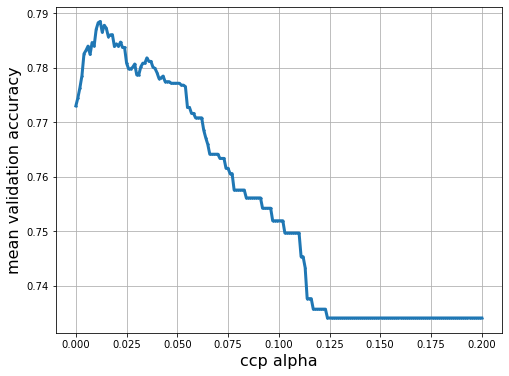

Grid best parameter (max. Accuracy):  {'ccp_alpha': 0.012, 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 20, 'random_state': 88}
Grid best score (Accuracy):  0.7884724279858143
Node count = 75


In [209]:
from sklearn.model_selection import GridSearchCV
grid_values = {'ccp_alpha': np.linspace(0,0.2,201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]} 

dtc = DecisionTreeRegressor()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values,
                          cv=5, verbose=1) 
dtc_cv_acc.fit(X_train, Y_train)


import matplotlib.pyplot as plt
acc = dtc_cv_acc.cv_results_['mean_test_score'] 
ccp = dtc_cv_acc.cv_results_['param_ccp_alpha'].data

plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()


print('Grid best parameter (max. Accuracy): ', dtc_cv_acc.best_params_)
print('Grid best score (Accuracy): ', dtc_cv_acc.best_score_)
print('Node count =', dtc_cv_acc.best_estimator_.tree_.node_count)

Model 3: Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(max_features=130,
                                min_samples_leaf=5,
                                n_estimators=500,
                                random_state=88) 
model3.fit(X_train, Y_train)
Y_pred3=model3.predict(X_test)

osr2_3=OSR2(Y_train,Y_test,Y_pred3)
print('The OSR^2 is: ',osr2_3)

The OSR^2 is:  0.8316347860610183


Cross Validation

{'max_features': 268, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


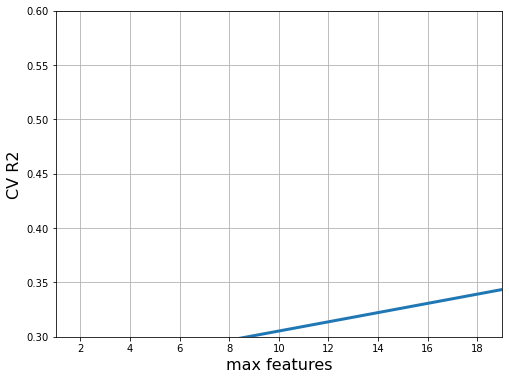

In [211]:
grid_values = {'max_features': np.linspace(1,len(X_train.columns),int(len(X_train.columns)/100), dtype='int32'),
              'min_samples_leaf': [5],
              'n_estimators': [500],
              'random_state': [88]} 

rf = RandomForestRegressor() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring='r2', cv=5)
rf_cv.fit(X_train, Y_train)

(0.0, 1.0)

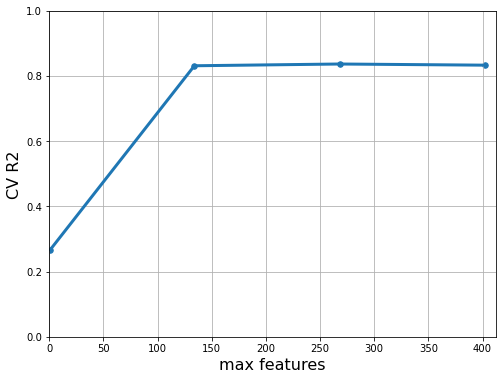

In [214]:
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']
plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, len(X_train.columns)+10])
plt.ylim([0, 1])

In [215]:
print(rf_cv.best_params_)

{'max_features': 268, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


In [64]:
importance=pd.DataFrame({'Feature' : X_train.columns,  
              'Importance score': 100*model3.feature_importances_}).round(1)

importance=importance.sort_values(by=['Importance score'],ascending=False)
importance=importance.reset_index(drop=True)

importance.head()

,Feature,Importance score
0,log_budget,40.6
1,vote_count,29.3
2,popularity,14.5
3,vote_average,5.6
4,year,1.3


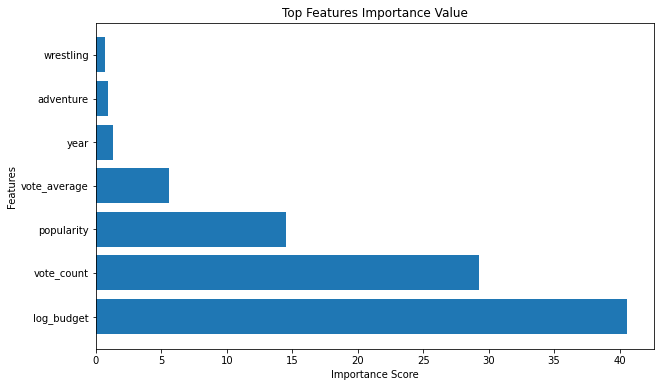

In [67]:
plt.figure(figsize=(10,6))
plt.barh(importance.loc[0:6,'Feature'], importance.loc[0:6,'Importance score'])
plt.title('Top Features Importance Value')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

Model 4: Boosting

In [222]:
from sklearn.ensemble import GradientBoostingRegressor

model4 = GradientBoostingRegressor(n_estimators=5000, learning_rate= 0.001, max_leaf_nodes=3,
                                max_depth=5, min_samples_leaf=10, random_state=88, verbose=1) 
model4.fit(X_train, Y_train)
Y_pred4=model4.predict(X_test)

osr2_4=OSR2(Y_train,Y_test,Y_pred4)
print('The OSR^2 is: ',osr2_4)

      Iter       Train Loss   Remaining Time 
         1          12.0419            1.51m
         2          12.0261            1.49m
         3          12.0104            1.49m
         4          11.9946            1.52m
         5          11.9790            1.51m
         6          11.9633            1.50m
         7          11.9477            1.46m
         8          11.9321            1.43m
         9          11.9165            1.40m
        10          11.9010            1.38m
        20          11.7473            1.32m
        30          11.5967            1.26m
        40          11.4490            1.24m
        50          11.3043            1.21m
        60          11.1625            1.21m
        70          11.0234            1.19m
        80          10.8871            1.19m
        90          10.7535            1.18m
       100          10.6226            1.18m
       200           9.4324            1.16m
       300           8.4484            1.19m
       40

In [ ]:
model4_2 = GradientBoostingRegressor(n_estimators=10000, learning_rate= 0.001, max_leaf_nodes=3,
                                max_depth=5, min_samples_leaf=10, random_state=88, verbose=1) 
model4_2.fit(X_train, Y_train)
Y_pred4_2=model4_2.predict(X_test)

In [224]:
osr2_4_2=OSR2(Y_train,Y_test,Y_pred4_2)
print('The OSR^2 is: ',osr2_4_2)

The OSR^2 is:  0.8232500790503152


In [226]:
model4_3 = GradientBoostingRegressor(n_estimators=50000, learning_rate= 0.001, max_leaf_nodes=3,
                                max_depth=5, min_samples_leaf=10, random_state=88, verbose=0) 
model4_3.fit(X_train, Y_train)
Y_pred4_3=model4_3.predict(X_test)

osr2_4_3=OSR2(Y_train,Y_test,Y_pred4_3)
print('The OSR^2 is: ',osr2_4_3)

The OSR^2 is:  0.8238451727363203


## EDA

In [35]:
movies['genres'].value_counts().head(20)

Drama                               250
Comedy                              208
Drama-Romance                       123
Comedy-Romance                      116
Comedy-Drama                        108
Horror-Thriller                      88
Comedy-Drama-Romance                 80
Action-Drama                         73
Drama-Thriller                       57
Documentary                          56
Horror                               50
Drama-History                        45
Action-Thriller                      44
Drama-Comedy                         39
Action-Crime-Thriller                37
Crime-Drama-Thriller                 36
Romance-Drama                        28
Action-Comedy                        26
Action-Adventure-Science Fiction     26
Action-Comedy-Crime                  26
Name: genres, dtype: int64

Text(0.5, 1.0, 'Distribution of runtime of movies')

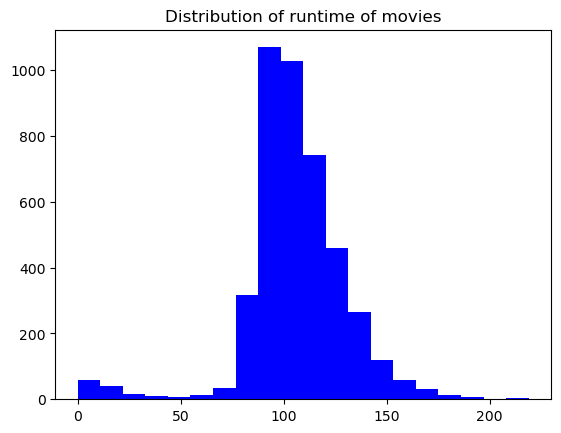

In [36]:
plt.hist(movies['runtime'], color = 'blue',bins = int(20))
plt.title('Distribution of runtime of movies')

Text(0.5, 1.0, 'Movie Budget Over Revenue Distribution')

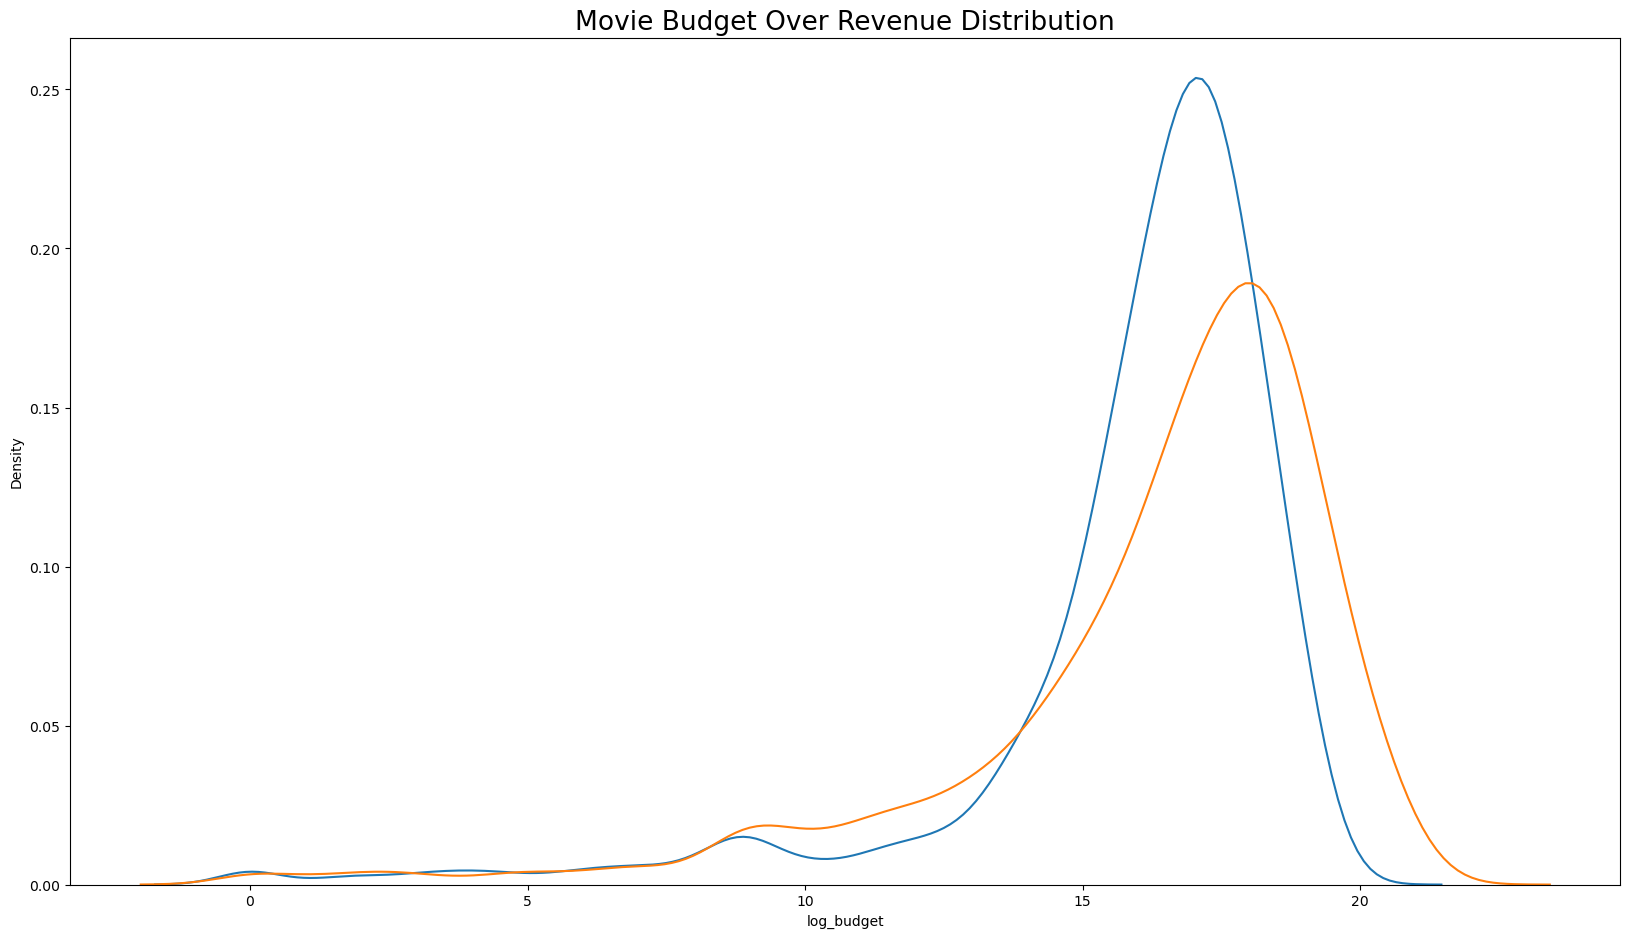

In [37]:
plt.figure(figsize=(20,11))
ax = sns.kdeplot(movies['log_budget'],label='Budget')
ax = sns.kdeplot(movies['log_revenue'],label='Revenue')
ax.set_title('Movie Budget Over Revenue Distribution',fontsize=19)

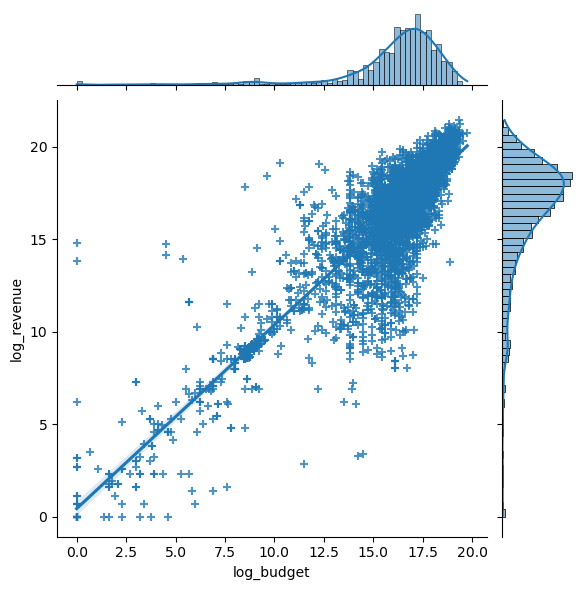

In [38]:
ax=sns.jointplot(data=movies, x='log_budget', y='log_revenue',kind="reg",marker="+")

Text(0.5, 1.0, 'Movie Popularity Distribution')

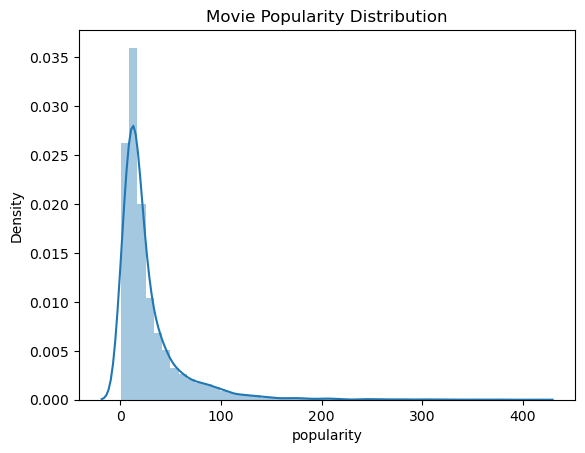

In [39]:
ax = sns.distplot(movies['popularity'])
ax.set_title('Movie Popularity Distribution')

Text(0.5, 1.0, 'Movie votes Distribution')

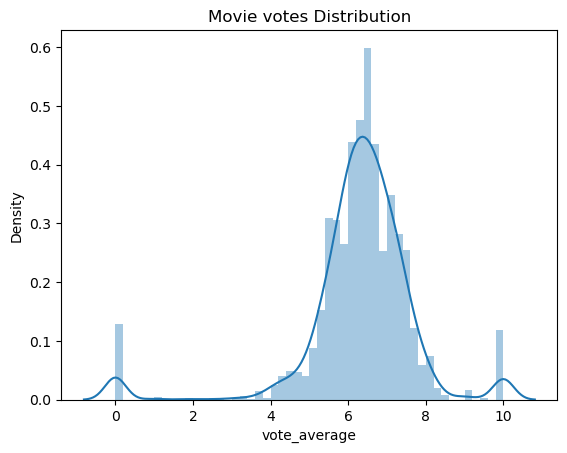

In [40]:
ax = sns.distplot(movies['vote_average'])
ax.set_title('Movie votes Distribution')

In [41]:
movies['Year'] = movies.release_date.apply(lambda x: x.year)
movies['Year']=pd.to_datetime(movies['Year'],format='%Y')
popularity_year=movies.groupby('Year')[['popularity']].mean()
vote_year=movies.groupby('Year')[['vote_count']].mean()
runtime_year=movies.groupby('Year')[['runtime']].mean()

Text(0.5, 1.0, 'Movie popularity over the years')

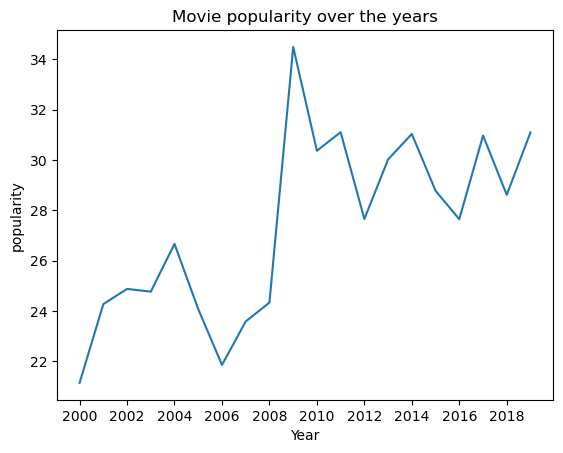

In [42]:
ax = sns.lineplot(data=popularity_year,x='Year',y='popularity')
ax.set_title('Movie popularity over the years')

Text(0.5, 1.0, 'Movie votes over the years')

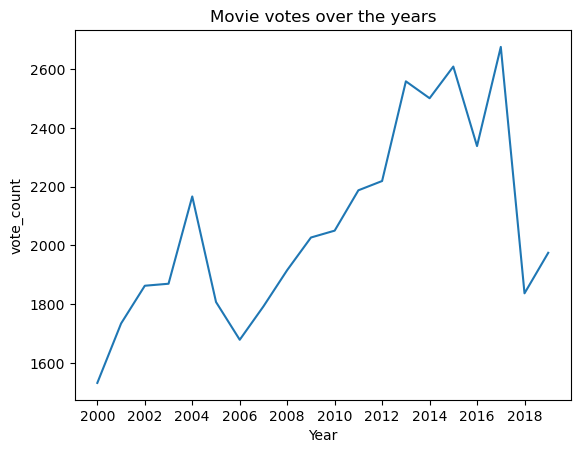

In [43]:
ax = sns.lineplot(data=vote_year,x='Year',y='vote_count')
ax.set_title('Movie votes over the years')

Text(0.5, 1.0, 'Movie runtime over the years')

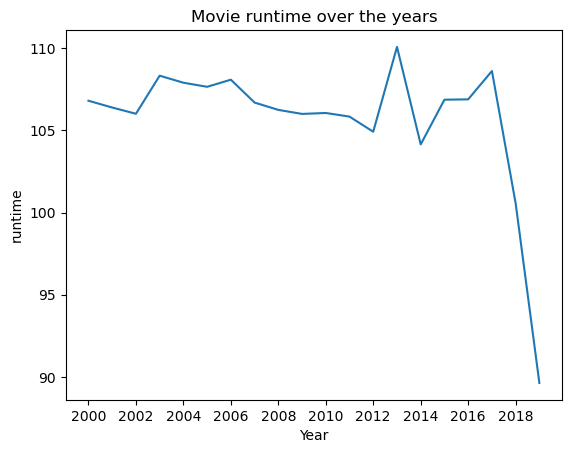

In [44]:
ax = sns.lineplot(data=runtime_year,x='Year',y='runtime')
ax.set_title('Movie runtime over the years')